In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import KID_S21 as S21
import pandas as pd
import glob 

import matplotlibcolors
plt.style.use('matplotlibrc')

%matplotlib widget

In [11]:
dir = r'Z:\KIDonSun\experiments\Entropy ADR\LT192Chip1_BF_20220317\S21\Power/'
df = S21.loop_over_S21_files(dir, kid=None, pread=104)
display(df)

c:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\spatial-mapping\NEW_S21_SCRIPT\KID_S21.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, new_entry], ignore_index=True)


,KID,Power,Temperature,f0,f0_std,Ql,Ql_std,Qc,Qc_std,Qi,Qi_std,Pint,redchisqr
0,10,-104.0,0.019265,7.926079,1.164233e-06,24025.767361,158.521435,23471.663242,395.357952,-1.017723e+06,631772.583762,-65.063392,0.001144
1,11,-104.0,0.019261,7.951291,8.354878e-07,23867.757920,110.096450,25115.732852,176.005135,4.803432e+05,63020.698398,-65.414725,0.000753
2,12,-104.0,0.019260,7.982158,2.034946e-06,17154.419459,129.135709,19689.458445,153.065105,1.332371e+05,6561.874418,-67.226316,0.001248
3,13,-104.0,0.019258,7.987653,7.978063e-07,17460.637733,54.708724,18391.153736,84.897509,3.451002e+05,28946.527286,-66.776386,0.000316
4,14,-104.0,0.019257,8.046888,2.537184e-07,14458.361361,12.109766,15036.916671,22.807093,3.757794e+05,13976.741783,-67.540705,0.000021
5,15,-104.0,0.019269,8.091038,5.298748e-07,22269.439826,60.215650,23253.989807,107.323993,5.259797e+05,53887.910926,-65.682288,0.000187
6,16,-104.0,0.019252,8.101269,2.236031e-07,19062.879522,18.572163,18581.677114,43.899238,-7.361149e+05,57449.959589,-66.058578,0.000024
7,17,-104.0,0.019254,8.167384,2.158249e-07,16657.045067,13.362945,16208.280090,29.319689,-6.016112e+05,32568.183950,-66.636909,0.000017
8,18,-104.0,0.019262,8.177121,2.724796e-07,16955.550820,17.685693,16515.282026,40.833324,-6.360335e+05,50004.927244,-66.564121,0.000028
9,19,-104.0,0.019269,8.211532,2.086893e-07,13259.492193,8.373384,13002.493115,23.489937,-6.708446e+05,55188.454426,-67.661227,0.000010


In [12]:
def fit(x, a, b):
    return a*x**(-2)+b 

6
3746498.5670952015 -37207.39101159864


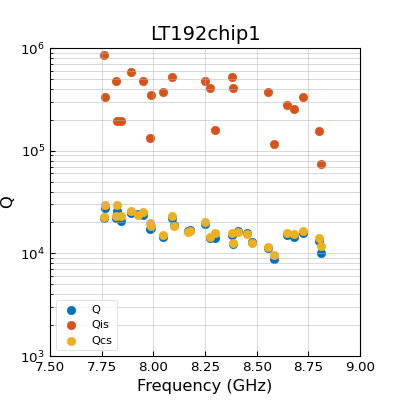

In [15]:
f0s = np.array(df['f0'])
Qs = np.array(df['Ql'])
Qis = np.array(df['Qi'])
Qcs = np.array(df['Qc'])

min_df = 0.002
df0s = f0s[1:] - f0s[:-1]
df_mask = np.zeros(f0s.shape, dtype=bool)
too_close = df0s < min_df
too_close_mask = np.hstack((False, too_close)) + np.hstack((too_close, False))
print(np.sum(too_close_mask))
popt, pcov = curve_fit(fit, f0s[~too_close_mask], Qcs[~too_close_mask])
f0s_fit = np.linspace(f0s[~too_close_mask].min(), f0s[~too_close_mask].max(), 100)

fig, ax = plt.subplots(figsize=(4,4))
ax.set_title('LT192chip1')
ax.set_yscale('log')
ax.scatter(f0s[~too_close_mask], Qs[~too_close_mask], label='Q')
ax.scatter(f0s[~too_close_mask], Qis[~too_close_mask], label='Qis')
ax.scatter(f0s[~too_close_mask], Qcs[~too_close_mask], label='Qcs')
# ax.plot(f0s_fit, fit(f0s_fit, *popt), label='fit $y=a/x^2 +b$', c='k', ls='--')
ax.set_xlim(7.5,9)
ax.set_xlabel('Frequency (GHz)')    
ax.set_ylim(1e3, 1e6)
ax.set_ylabel('Q')
ax.legend()
print(*popt)

Text(0, 0.5, 'Length coupler (um)')

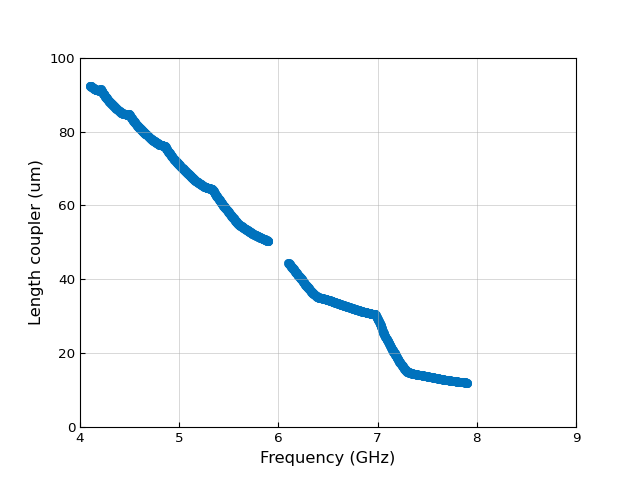

In [56]:
couplers = np.load(r'C:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\spatial-mapping\Mappings\LT361w2chip9\LT361_4-8GHz_1024px_couplers.npy')
f0s_design = np.load(r'C:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\spatial-mapping\Mappings\LT361w2chip9\LT361_4-8GHz_1024px_F0s.npy')*1e-9
fig, ax = plt.subplots()
ax.scatter(f0s_design, couplers)
ax.set_xlim(4,9)
ax.set_xlabel('Frequency (GHz)')    
ax.set_ylim(0, 100)
ax.set_ylabel('Length coupler (um)')